# HW 2: Wrangling

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

The Price variable was initially an object. I converted it into a numeric (float) to find how many rows hold no value, or N/A. There is 181 missing values in the Price column.

2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred
. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?

The subject_injury variable was cleaned by standardizing responses to Yes and No and labeling N/A values as missing. After cleaning, about 76% of the values are missing, which is a serious concern because most incidents do not report whether an injury occured. The cross-tabulation with force_type shows that missing values are not evenly distributed, with large amounts of missing data for catergories like Bodily Force, Chemical Irritant, and Taser which suggests that injusty reporting may be less complete for certain types of force.

3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [3]:
#Q1.1
import pandas as pd

data = pd.read_csv("airbnb_hw.csv")
data.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [11]:
#Q1.1
data["Price"].dtype

dtype('O')

In [14]:
#Q1.1
data["Price"] = pd.to_numeric(data["Price"], errors="coerce")

In [15]:
#Q1.1
data["Price"].dtype

dtype('float64')

In [17]:
#Q1.1
data["Price"].isna().sum()

np.int64(181)

In [18]:
#Q1.2
police = pd.read_csv("mn_police_use_of_force.csv")
police.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [21]:
#Q1.2
police["subject_injury"].value_counts(dropna=False)

,count
subject_injury,
NaN,9848
Yes,1631
No,1446


In [25]:
#Q1.2
missing_prop = (police["subject_injury"].isna().mean())
missing_prop

np.float64(0.7619342359767892)

In [26]:
#Q1.2
pd.crosstab(police["force_type"], police["subject_injury_clean"])

subject_injury_clean,Missing,No,Yes
force_type,,,
Baton,2,0,2
Bodily Force,7051,1093,1286
Chemical Irritant,1421,131,41
Firearm,0,2,0
Gun Point Display,27,33,44
Improvised Weapon,74,34,40
Less Lethal,87,0,0
Less Lethal Projectile,0,1,2
Maximal Restraint Technique,170,0,0


In [27]:
#Q1.2
police["subject_injury"].isna().sum() / len(police)

np.float64(0.7619342359767892)

In [66]:
#Q1.3
import pandas as pd

justice = pd.read_json("justice_data.parquet")
justice.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf0 in position 7: invalid continuation byte

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.

Completed below.

2. Drop any columns that do not contain data.

I dropped columns that were completely empty (all missing values), including fields related to links, case numbers, and unnamed placeholder columns that contained no usable data.

3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?

Removed invalid values, and the years range from 1940 to 2026. After filtering to attacks since 1940, the counts per year generally increase over time, with noticeably higher numbers in recent decades compared to the 1940s–1960s, suggesting an upward trend in reported shark attacks.

4. Clean the Age variable and make a histogram of the ages of the victims.

Removed the blank spaces and question marks in the Age variable. Histogram shown below.

5. What proportion of victims are male?

80% of the victims are male.

6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?

About 74% of attacks are unprovoked.

7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.

Completed below.

8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?

Based on the tables, men experience a higher proportion of unprovoked attacks than women, with most male cases falling in the unprovoked category, while women have a smaller but still large share of unprovoked attacks. Attacks are much more likely to be fatal when they are unprovoked (about 24%) compared to provoked attacks (about 3%), showing that unprovoked encounters tend to be more dangerous. Fatal attacks are also more common among male victims than female victims. I believe sharks are scary.

9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

About 11% of attacks appear to be by white sharks.

In [9]:
#Q2.1
import pandas as pd

sharks = pd.read_excel("GSAF5.xls")
sharks.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,10th January,2026.0,Unprovoked,Australia,NSW,Avalon Beach,Surfing,Paul Stanton,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8th January,2026.0,Unprovoked,US Virgin Islands,Fredricksted Island St Croix,Dorsch Beach,Snorkeling,Arlene Lillis,F,56,...,Unknown,Todd Smith: KevinMcMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3rd January,2026.0,Unprovoked,New Caledonia,Kélé,Between Bourail and Moindou,Scuba Diving,Unknown,M,?,...,Unknown,Andy Currie: Province Sud:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21st December,2025.0,Unprovoked,USA,California,Lovers Point Pacific Grove,Swimming,Erica Fox,F,55,...,Great White Shark,Kevin McMurray Tracking sharks.com: Ralph Coll...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12th December,2025.0,Unprovoked,USA,Sonoma County California,Salmon Creek,Surfing,Unknown,M,?,...,Suspected Great White Shark,Kevin McMurray Tracking sharks.com:Andrew Curr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Q2.2
sharks = sharks.drop(columns=[
    "pdf",
    "href formula",
    "href",
    "Case Number",
    "Case Number.1",
    "original order",
    "Unnamed: 21",
    "Unnamed: 22"
])
sharks.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
0,10th January,2026.0,Unprovoked,Australia,NSW,Avalon Beach,Surfing,Paul Stanton,M,?,puncture mark to left thumb,N,0540hrs,Unknown,Bob Myatt GSAF
1,8th January,2026.0,Unprovoked,US Virgin Islands,Fredricksted Island St Croix,Dorsch Beach,Snorkeling,Arlene Lillis,F,56,Left arm torn off in the attack below the elbow,Y,1628hrs,Unknown,Todd Smith: KevinMcMurray Trackingsharks.com
2,3rd January,2026.0,Unprovoked,New Caledonia,Kélé,Between Bourail and Moindou,Scuba Diving,Unknown,M,?,Injuries to upper limbs,N,?,Unknown,Andy Currie: Province Sud:
3,21st December,2025.0,Unprovoked,USA,California,Lovers Point Pacific Grove,Swimming,Erica Fox,F,55,Taken by shark body recovered with multiple in...,Y,1200hrs,Great White Shark,Kevin McMurray Tracking sharks.com: Ralph Coll...
4,12th December,2025.0,Unprovoked,USA,Sonoma County California,Salmon Creek,Surfing,Unknown,M,?,Hand Injury,N,0800hrs,Suspected Great White Shark,Kevin McMurray Tracking sharks.com:Andrew Curr...


In [15]:
#Q2.3
sharks = sharks.dropna(subset=["Year"])
sharks["Year"].min(), sharks["Year"].max()


(0.0, 2026.0)

In [18]:
recent = sharks[sharks["Year"] >= 1940]
attacks_per_year = recent["Year"].value_counts().sort_index()
attacks_per_year

,count
Year,
1940.0,24
1941.0,27
1942.0,41
1943.0,28
1944.0,31
...,...
2022.0,98
2023.0,109
2024.0,52


In [27]:
#Q2.4
sharks["Age"] = sharks["Age"].replace(["?", " ", ""], pd.NA)
sharks["Age"] = pd.to_numeric(sharks["Age"], errors="coerce")

/tmp/ipython-input-776429904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks["Age"] = sharks["Age"].replace(["?", " ", ""], pd.NA)
/tmp/ipython-input-776429904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks["Age"] = pd.to_numeric(sharks["Age"], errors="coerce")


In [28]:
sharks["Age"]

,Age
0,NaN
1,56.0
2,NaN
3,55.0
4,NaN
...,...
7060,NaN
7061,NaN
7062,NaN
7063,NaN


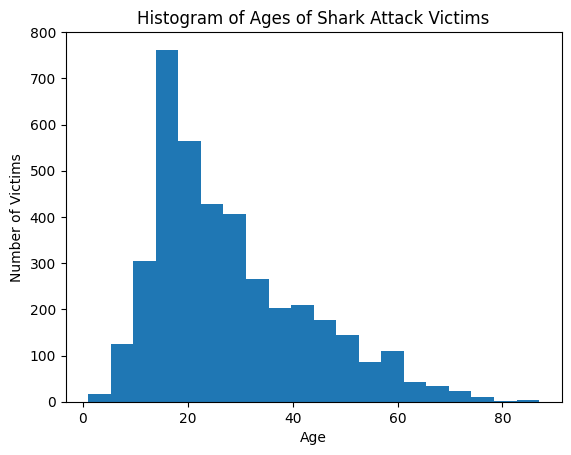

In [31]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(sharks["Age"].dropna(), bins=20)
plt.xlabel("Age")
plt.ylabel("Number of Victims")
plt.title("Histogram of Ages of Shark Attack Victims")
plt.show()


In [33]:
#Q2.5
sharks["Sex"].value_counts(dropna=False)
prop_male = (sharks["Sex"] == "M").mean()
prop_male

np.float64(0.8017839444995044)

In [34]:
#Q2.6
sharks["Type"].value_counts(dropna=False)


,count
Type,
Unprovoked,5216
Provoked,641
Invalid,551
Watercraft,355
Sea Disaster,242
Questionable,26
NaN,18
Boat,7
Provoked,2


In [35]:
sharks["Type"] = sharks["Type"].str.strip()
sharks.loc[sharks["Type"] == "Unprovoked", "Type"] = "Unprovoked"
sharks.loc[sharks["Type"] == "Provoked", "Type"] = "Provoked"
sharks.loc[~sharks["Type"].isin(["Unprovoked", "Provoked"]), "Type"] = "Unknown"


/tmp/ipython-input-654108768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks["Type"] = sharks["Type"].str.strip()


In [36]:
sharks["Type"].value_counts()


,count
Type,
Unprovoked,5216
Unknown,1204
Provoked,643


In [43]:
prop_unprovoked = (sharks["Type"] == "Unprovoked").mean()
prop_unprovoked

np.float64(0.738496389636132)

In [39]:
#Q2.7
sharks["Fatal Y/N"].value_counts(dropna=False) #check for missing data
sharks["Fatal Y/N"] = sharks["Fatal Y/N"].astype(str).str.strip()

sharks.loc[sharks["Fatal Y/N"] == "Y", "Fatal Y/N"] = "Y"
sharks.loc[sharks["Fatal Y/N"] == "N", "Fatal Y/N"] = "N"
sharks.loc[~sharks["Fatal Y/N"].isin(["Y", "N"]), "Fatal Y/N"] = "Unknown"

sharks["Fatal Y/N"].value_counts()


/tmp/ipython-input-1675758102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks["Fatal Y/N"] = sharks["Fatal Y/N"].astype(str).str.strip()


,count
Fatal Y/N,
N,4934
Y,1485
Unknown,644


In [47]:
#Q2.8
#FATAL VS PROVOKED / UNPROVOKED
pd.crosstab(sharks["Type"], sharks["Fatal Y/N"], normalize="index")


Fatal Y/N,N,Unknown,Y
Type,,,
Provoked,0.951788,0.015552,0.032659
Unknown,0.373754,0.460133,0.166113
Unprovoked,0.742331,0.015337,0.242331


In [44]:
#PROPOTYION FATAL VS SEX
pd.crosstab(sharks["Type"], sharks["Fatal Y/N"], normalize="index")

Fatal Y/N,N,Unknown,Y
Type,,,
Provoked,0.951788,0.015552,0.032659
Unknown,0.373754,0.460133,0.166113
Unprovoked,0.742331,0.015337,0.242331


In [48]:
#UNPROVOKED ATTACKS BY SEX
pd.crosstab(sharks["Sex"], sharks["Type"], normalize="index")


Type,Provoked,Unknown,Unprovoked
Sex,,,
M,0.000000,0.000000,1.000000
.,0.000000,1.000000,0.000000
F,0.038366,0.113861,0.847772
F,0.000000,0.000000,1.000000
M,0.097475,0.133675,0.768850
M,0.000000,0.000000,1.000000
M x 2,0.000000,1.000000,0.000000
N,0.500000,0.500000,0.000000
lli,0.000000,0.000000,1.000000


In [50]:
#Q2.9
sharks["Species "].head(20)


,Species
0,Unknown
1,Unknown
2,Unknown
3,Great White Shark
4,Suspected Great White Shark
5,Black Tip Reef Shark
6,3m Bull shark
7,3m Bull shark
8,Great White Shark
9,3m shark


In [61]:
white = sharks["Species "].fillna("").str.lower().str.contains("white")
white.value_counts()

,count
Species,
False,6307
True,756


In [62]:
prop_white = white.mean()
prop_white

np.float64(0.10703666997026759)

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?

  The paper is about how to organize data in a simple, consistent way called tidy data so it is easier to analyze and visualize. It explains that many problems in data analysis come from messy data layouts and argues that each variable should be a column, each observation a row, and each type of data its own table, which makes working with data much easier and more reliable.

  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

  The tidy data standard is meant to make data easier to clean, explore, and analyze by giving it a consistent structure. By organizing data the same way every time, analysts don’t have to keep reshaping datasets between steps, and tools can work together more smoothly which lets people focus on the analysis instead of data formatting

  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

  The first sentence means that tidy datasets tend to look similar and follow the same basic structure, but messy datasets can be messy in many different and unpredictable ways, so there’s no single fix that works for all of them. The second sentence means that within one specific dataset, it’s usually clear what counts as a variable and what counts as an observation, but when you try to make general rules that work for all datasets and all situations, those definitions can get blurry and depend on context and how the data will be used.

  4. Read Section 2.2. How does Wickham define values, variables, and observations?

  Wickham explains that values are the actual data entries (numbers or text), variables are groups of values that measure the same thing (like height or temperature), and observations are all the values collected for one unit, such as one person, one day, or one event. In other words, variables describe what is being measured, and observations describe who or what is being measured.

  5. How is "Tidy Data" defined in section 2.3?

  In 2.3, tidy data is defined by three simple rules: each variable is a column, each observation is a row, and each type of observational unit is stored in its own table. This structure makes datasets easier to understand and easier to use with analysis tools because everything is organize.

  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

  Messy datasets often have issues like variables stored in column headers, multiple variables in one column, variables split across rows and columns, mixed types of observations in one table, or the same observations spread across tables. Table 4 is messy because income ranges are column headers instead of values in a single income column. “Melting” means stacking those columns into rows so the variable and its values each have their own column, helping make the data tidy.

  7. Why, specifically, is table 11 messy but table 12 is tidy and "molten"?

  Table 11 is messy because variables are split across both rows and columns: days are spread across many columns (d1–d31) and measurement type (tmin, tmax) is stored in rows, so neither is in a single column. Table 12(a) is “molten” because the day columns are stacked into rows, creating a value column and a column for measurement type. Table 12(b) is fully tidy because each variable has its own column (like date, tmin, and tmax) and each row represents one day’s observation.

  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

  Wickham says the “chicken-and-egg” problem is that tidy data is only useful if there are good tools that work with it, but tools are often designed around existing data formats, so it’s hard to improve one without improving the other at the same time. He hopes that future work will build on the tidy data idea to create better data structures and better tools together, and that researchers will study how people actually work with data to design systems that reduce friction in data cleaning and analysis.